In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


(40000.0, 170000.0)

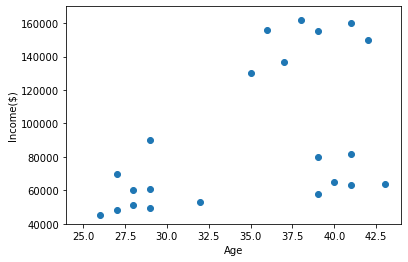

In [4]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.xlim(24,44)
plt.ylim(40000,170000)

In [15]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans(n_clusters=3)
#found the label data 
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [17]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [18]:
#centroid
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [25]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]
print(df1)
print('-'*75)
print(df2)
print('-'*75)
print(df3)
print('-'*75)

        Name  Age  Income($)  cluster
4       Kory   42     150000        0
5     Gautam   39     155000        0
6      David   41     160000        0
7     Andrea   38     162000        0
8       Brad   36     156000        0
9   Angelina   35     130000        0
10    Donald   37     137000        0
---------------------------------------------------------------------------
        Name  Age  Income($)  cluster
2      Mohan   29      61000        1
3     Ismail   28      60000        1
11       Tom   26      45000        1
12    Arnold   27      48000        1
13     Jared   28      51000        1
14     Stark   29      49500        1
15    Ranbir   32      53000        1
16    Dipika   40      65000        1
17  Priyanka   41      63000        1
18      Nick   43      64000        1
21     Abdul   39      58000        1
---------------------------------------------------------------------------
       Name  Age  Income($)  cluster
0       Rob   27      70000        2
1   Michael   

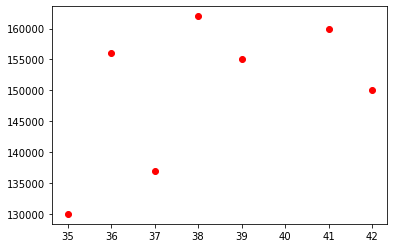

In [26]:
plt.scatter(df1['Age'], df1['Income($)'], c='red')

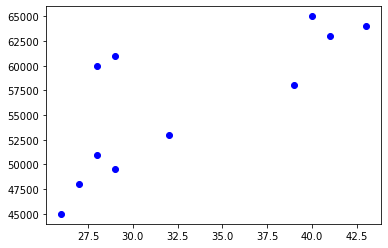

In [27]:
plt.scatter(df2['Age'], df2['Income($)'], c='blue')

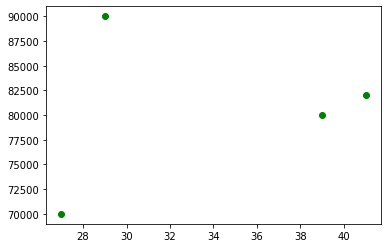

In [29]:
plt.scatter(df3['Age'], df3['Income($)'], c='green')

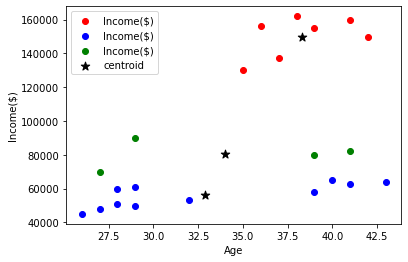

In [44]:
plt.scatter(df1['Age'], df1['Income($)'], c='red',label='Income($)')
plt.scatter(df2['Age'], df2['Income($)'], c='blue',label='Income($)')
plt.scatter(df3['Age'], df3['Income($)'], c='green',label='Income($)')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='black',marker='*',label='centroid',s=80)
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

**Preprocessing using min max scaler**

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [50]:
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df['Income($)']

0     0.213675
1     0.384615
2     0.136752
3     0.128205
4     0.897436
5     0.940171
6     0.982906
7     1.000000
8     0.948718
9     0.726496
10    0.786325
11    0.000000
12    0.025641
13    0.051282
14    0.038462
15    0.068376
16    0.170940
17    0.153846
18    0.162393
19    0.299145
20    0.316239
21    0.111111
Name: Income($), dtype: float64

In [51]:
df['Age'] = scaler.fit_transform(df[['Age']])
df['Age']

0     0.058824
1     0.176471
2     0.176471
3     0.117647
4     0.941176
5     0.764706
6     0.882353
7     0.705882
8     0.588235
9     0.529412
10    0.647059
11    0.000000
12    0.058824
13    0.117647
14    0.176471
15    0.352941
16    0.823529
17    0.882353
18    1.000000
19    0.764706
20    0.882353
21    0.764706
Name: Age, dtype: float64

In [52]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


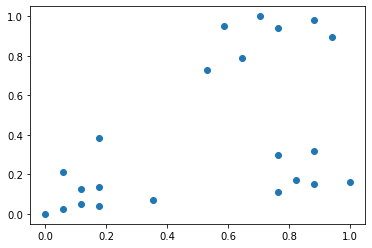

In [53]:
plt.scatter(df['Age'], df['Income($)'])

In [54]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [57]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [60]:
df['cluster'] = y_pred
df['cluster']

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    2
17    2
18    2
19    2
20    2
21    2
Name: cluster, dtype: int32

In [61]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])